<a href="https://colab.research.google.com/github/Rachel-0420/Fast-Transient-Data/blob/main/PrestoColor2-main/ProbabilityCube.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/Shareddrives/FASTlab/PrestoColor2

[Errno 2] No such file or directory: '/content/drive/Shareddrives/FASTlab/PrestoColor2'
/content


In [3]:
import numpy as np
# import Functions
import pickle
import os
from matplotlib.colors import LogNorm

import matplotlib.pyplot as plt

In [5]:
def Enquiry(HashTable, CoordinateDict, Band1, Band2, dT1, dT2, dMag=None, Color=None):

    Ind1 = CoordinateDict['Bands'].index(Band1)
    Ind2 = CoordinateDict['Bands'].index(Band2)

    Ind3 = abs( dT1 - CoordinateDict['dT1s'] ).argmin()
    Ind4 = abs( dT2 - CoordinateDict['dT2s'] ).argmin()

    if dMag == None:
        Ind5 = None
    elif dMag<CoordinateDict['BinMag'][0] or dMag>=CoordinateDict['BinMag'][-1]:
        print('The value of dMag is out of boundary, the available interval is [{:.2f}, {:.2f}).'.format(CoordinateDict['BinMag'][0], CoordinateDict['BinMag'][-1]))
        return
    else:
        Ind5 = np.where( dMag >= CoordinateDict['BinMag'] )[0][-1]

    if Color == None:
        Ind6 = None
    elif Color<CoordinateDict['BinColor'][0] or Color>=CoordinateDict['BinColor'][-1]:
        print('The value of Color is out of boundary, the available interval is [{:.2f}, {:.2f}).'.format(CoordinateDict['BinColor'][0], CoordinateDict['BinColor'][-1]))
        return
    else:
        Ind6 = np.where( Color >= CoordinateDict['BinColor'] )[0][-1]

    return HashTable[Ind1, Ind2, Ind3, Ind4, Ind5, Ind6]

In [4]:
with open('/content/drive/MyDrive/Datacubes/ProbabilityCube_SNIa_1slice.pkl', 'rb') as f:
    EventNames = pickle.load(f)
    CoordinateDict = pickle.load(f)
    HashTable = pickle.load(f)

In [6]:
#Set the parameters: band1, band2, dT1, dT2, dMag, Color. The number of cases in the cell is returned.

Enquiry(HashTable, CoordinateDict, 'g', 'i', 60, 450, 3.82, 0)

The value of dMag is out of boundary, the available interval is [-1.25, 3.75).


In [7]:
Enquiry(HashTable, CoordinateDict, 'g', 'i', 60, 450, 0.04, 0)

0

In [8]:
CoordinateDict

{'Bands': ['g', 'i'],
 'dT1s': array([60]),
 'dT2s': array([450]),
 'BinMag': array([-1.25, -0.75, -0.25,  0.25,  0.75,  1.25,  1.75,  2.25,  2.75,
         3.25,  3.75]),
 'BinColor': array([-9.25, -8.75, -8.25, -7.75, -7.25, -6.75, -6.25, -5.75, -5.25,
        -4.75, -4.25, -3.75, -3.25, -2.75, -2.25, -1.75, -1.25, -0.75,
        -0.25,  0.25,  0.75,  1.25,  1.75,  2.25,  2.75,  3.25,  3.75,
         4.25,  4.75,  5.25,  5.75,  6.25,  6.75,  7.25,  7.75,  8.25,
         8.75,  9.25,  9.75])}

In [11]:
LogNorm(vmin=Map[0,0].min(), vmax=Map[0,0].max())

(-7.5, 4.0)

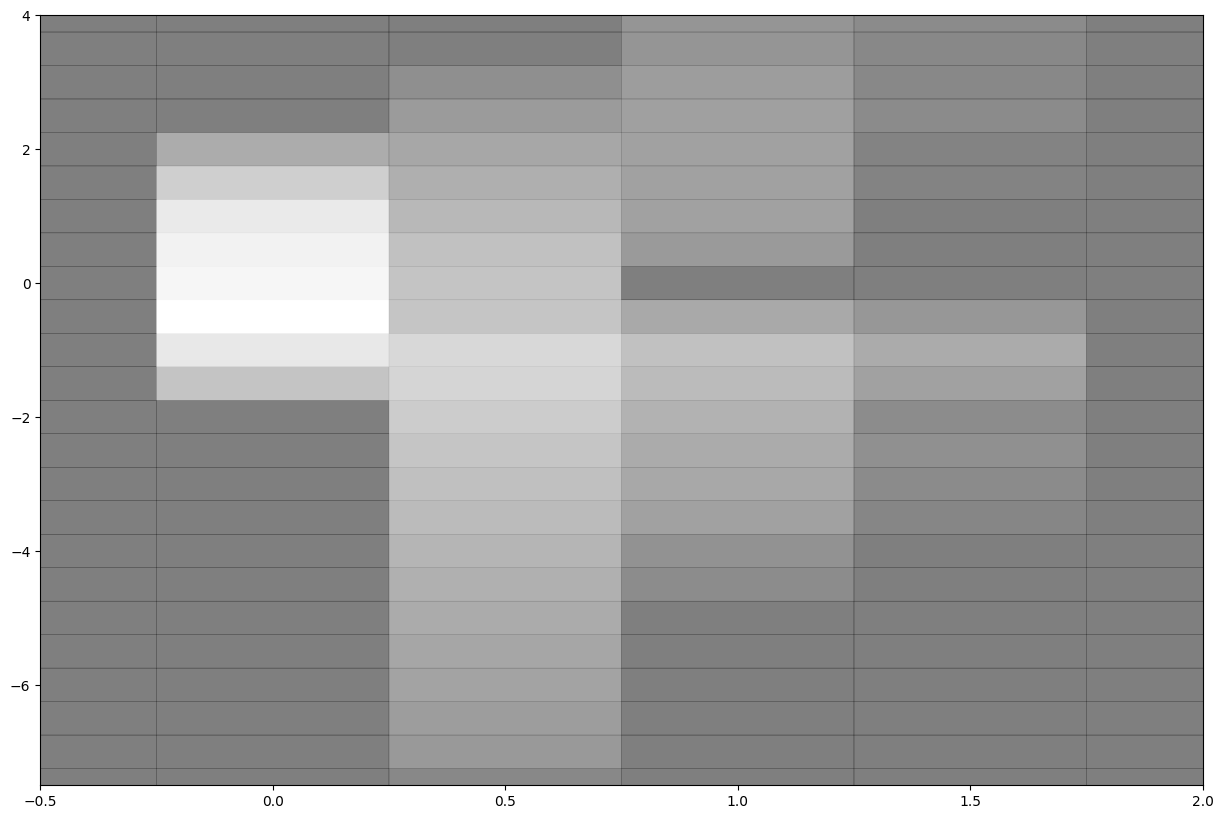

In [12]:
#If dMag and Color are not given, a 2-D array will be returned.
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

Map = Enquiry(HashTable, CoordinateDict, 'g', 'g', 60, 450)
plt.pcolor(CoordinateDict['BinMag'], CoordinateDict['BinColor'], np.transpose(Map[0,0])+1, edgecolors='face',
           norm=LogNorm(1, vmax=Map[0,0].max()+1), cmap='gist_gray', alpha=0.5)
plt.xlim([-0.5, 2])
plt.ylim([-7.5, 4])
# plt.axis('equal')

In [13]:
HashTable.shape

(2, 2, 1, 1, 10, 38)

(-7.5, 4.0)

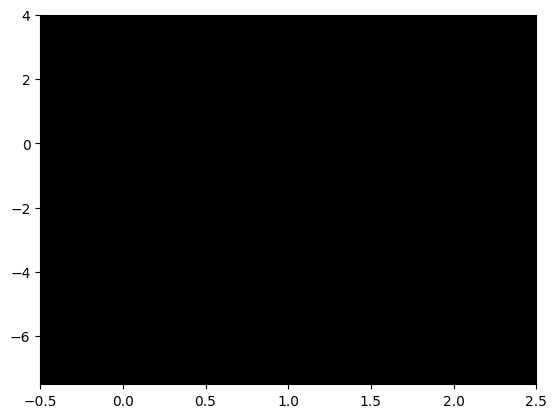

In [20]:
#If dMag and Color are not given, a 2-D array will be returned.

Map = Enquiry(HashTable, CoordinateDict, 'g', 'i', 60, 450)
plt.pcolor(CoordinateDict['BinMag'], CoordinateDict['BinColor'], np.transpose(Map[0,0]), cmap='gist_gray')
plt.xlim([-0.5, 2.5])
plt.ylim([-7.5, 4])
# plt.axis('equal')

In [21]:
data = CalculateMap('/content/drive/MyDrive/Datacubes/Extragalactic_PrestoColor_Cube.pkl', 'SNIa-SALT2', 'g', 'i', 60, 450, PointsPDay=0.1)

NotADirectoryError: [Errno 20] Not a directory: '/content/drive/MyDrive/Datacubes/Extragalactic_PrestoColor_Cube.pkl/SNIa-SALT2_Interp.pkl'

NameError: name 'plotting' is not defined

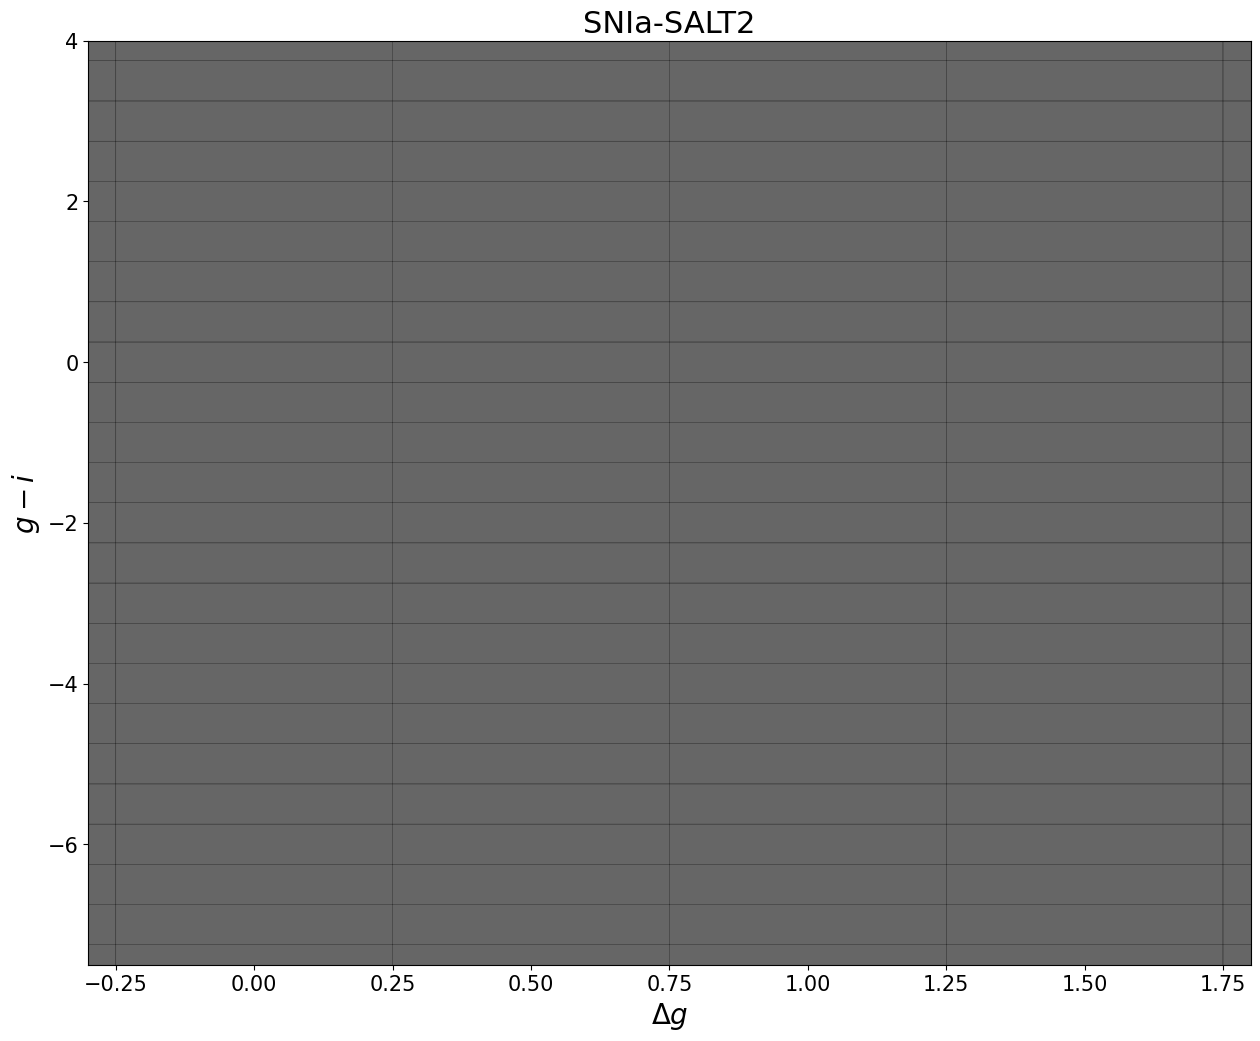

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(15, 12))
ax.set_xlabel("$\Delta {0}$".format('g'), fontsize=20)
ax.set_ylabel('${0}-{1}$'.format('g','i'), fontsize=20)
ax.tick_params(labelsize=15 )
ax.set_title('SNIa-SALT2', fontsize=22)

plt.xlim([-0.3, 1.8])
plt.ylim([-7.5, 4])

plt.pcolor(CoordinateDict['BinMag'], CoordinateDict['BinColor'], np.transpose(Map[0,0])+1, edgecolors='face',
           norm=LogNorm(1, vmax=Map[0,0].max()+1), cmap='gist_gray', alpha=0.6)

ax.scatter([10], [10])

plotting.scatter_contour(data[0], data[1],
                         threshold=50,log_counts=True,
                         histogram2d_args=dict(bins=(100,100)), filled_contour=False,
                         plot_args=dict(marker='.', linestyle='none', color='black', alpha=0.1),
                         contour_args=dict(alpha=1, cmap='bone'))

In [18]:
def CalculateMap(PathInterp, EventName, Band1, Band2, dT1, dT2, PointsPDay = 50, Thr=27.5, Save=0, TargetFolder='MapData'):

    FilePath = os.path.join(PathInterp, EventName+'_Interp.pkl')

    with open(FilePath, 'rb') as f:
        Interp_load = pickle.load(f)
        TimeRange_load = pickle.load(f)

    dMag = []
    Color = []

    for II in range(len(Interp_load[Band1])):

        if Interp_load[Band1][II]==[] or Interp_load[Band2][II]==[]:
            continue

        if II%5000 == 4999:
            print('|')
        elif II%50 == 49:
            print('|', end='' )

        TimeRangeStart = max( TimeRange_load[Band1][II][0], TimeRange_load[Band2][II][0] - dT1/1440 )
        TimeRangeEnd = min( TimeRange_load[Band1][II][1] - dT2/1440, TimeRange_load[Band2][II][1] - dT1/1440 )

        TimeRange = TimeRangeEnd - TimeRangeStart
        SampleNo = np.int(PointsPDay*TimeRange)

        XX = np.random.rand(SampleNo)*TimeRange + TimeRangeStart

        Mag1 = Interp_load[Band1][II](XX)
        Mag2 = Interp_load[Band2][II](XX+dT1/1440)
        Mag12 = Interp_load[Band1][II](XX+dT2/1440)

        Mask = (Mag1<Thr) * (Mag2<Thr) *(Mag12<Thr)

        dMag.extend(Mag1[Mask] - Mag12[Mask])
        Color.extend(Mag1[Mask] - Mag2[Mask])

    data = np.array([dMag, Color])

    if Save == 1:

        TargetPath = os.path.join(Path0, TargetFolder)
        if not os.path.isdir(TargetPath):
            os.mkdir(TargetPath)
        os.chdir(TargetPath)

        Ind1 = PathInterp.rfind('/')
        Ind2 = PathInterp.rfind('_')

        FileName = '{}{}_dT1_{}_dT2_{}_PPD{}_Thr{}_{}_Source_{}.npy'.format(Band1, Band2, dT1, dT2, PointsPDay, Thr, EventName, PathInterp[Ind1+1:Ind2])
        np.save(FileName, data)

        print('The data is saved at {} as {}.'.format(TargetPath, FileName))

    print('Finish!')

    return data

In [19]:
from astroML import plotting

ModuleNotFoundError: No module named 'astroML'

In [23]:
aa = np.array([[1,2],[3,4]])
aa

array([[1, 2],
       [3, 4]])

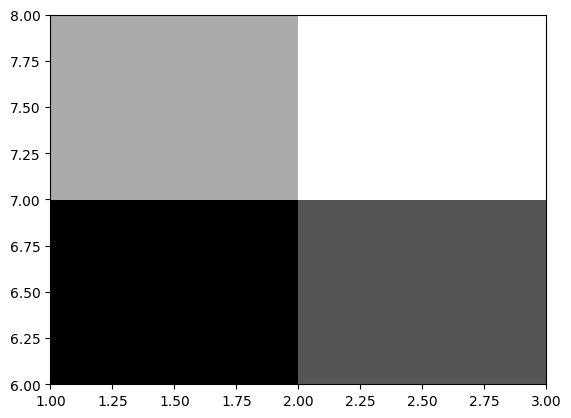

In [24]:
plt.pcolor([1,2,3], [6,7,8], aa, cmap='gist_gray')

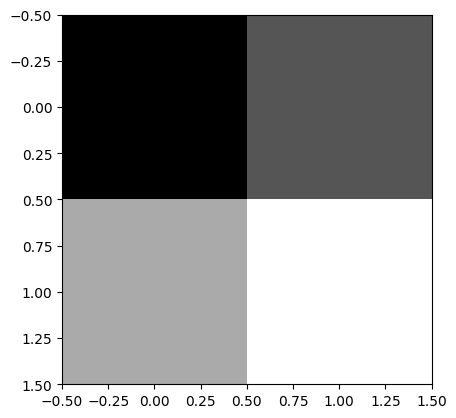

In [25]:
plt.imshow(aa, cmap='gist_gray')

In [26]:
xx = np.ones(10)*1.999
yy = np.array([0, 0, 0, 3, 3, 4, 4, 4, 4, 4])

In [27]:
xx

array([1.999, 1.999, 1.999, 1.999, 1.999, 1.999, 1.999, 1.999, 1.999,
       1.999])

In [28]:
xbins = np.arange(4)
ybins = np.arange(-0.75, 6.5, 0.5)

In [29]:
ybins

array([-0.75, -0.25,  0.25,  0.75,  1.25,  1.75,  2.25,  2.75,  3.25,
        3.75,  4.25,  4.75,  5.25,  5.75,  6.25])

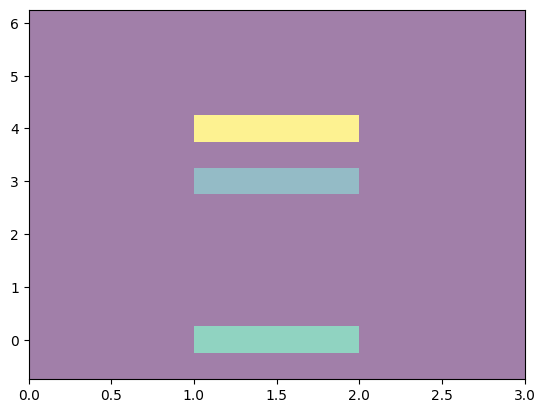

In [30]:
Hist = plt.hist2d(xx, yy, bins=[xbins, ybins], alpha = 0.5)

In [31]:
Hist[0]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 3., 0., 0., 0., 0., 0., 2., 0., 5., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

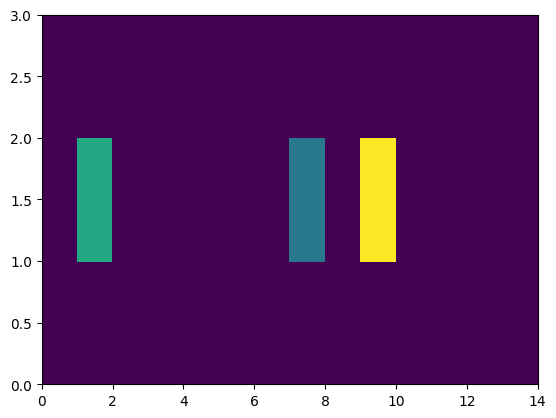

In [32]:
plt.pcolor(Hist[0])

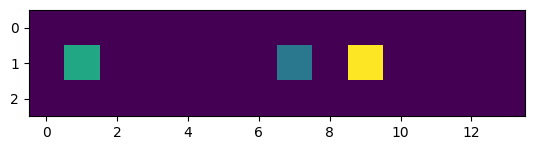

In [33]:
plt.imshow(Hist[0])

In [34]:
xx = np.arange(0, 10, 0.01)
yy = np.sin(xx)

xbin = np.arange(-0.75, 10.3, 0.5)
ybin = np.arange(-1.7, 1.8, 0.2)

In [40]:
Noise1 = np.random.normal(scale = 0.2, size=1000)
Noise2 = np.random.normal(scale = 0.2, size=1000)

In [36]:
Noise.shape

NameError: name 'Noise' is not defined

In [37]:
xx.shape

(1000,)

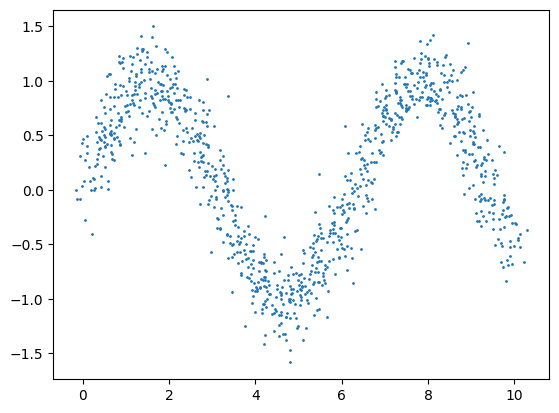

In [41]:
plt.scatter(xx+Noise1,yy+Noise2, s=1)

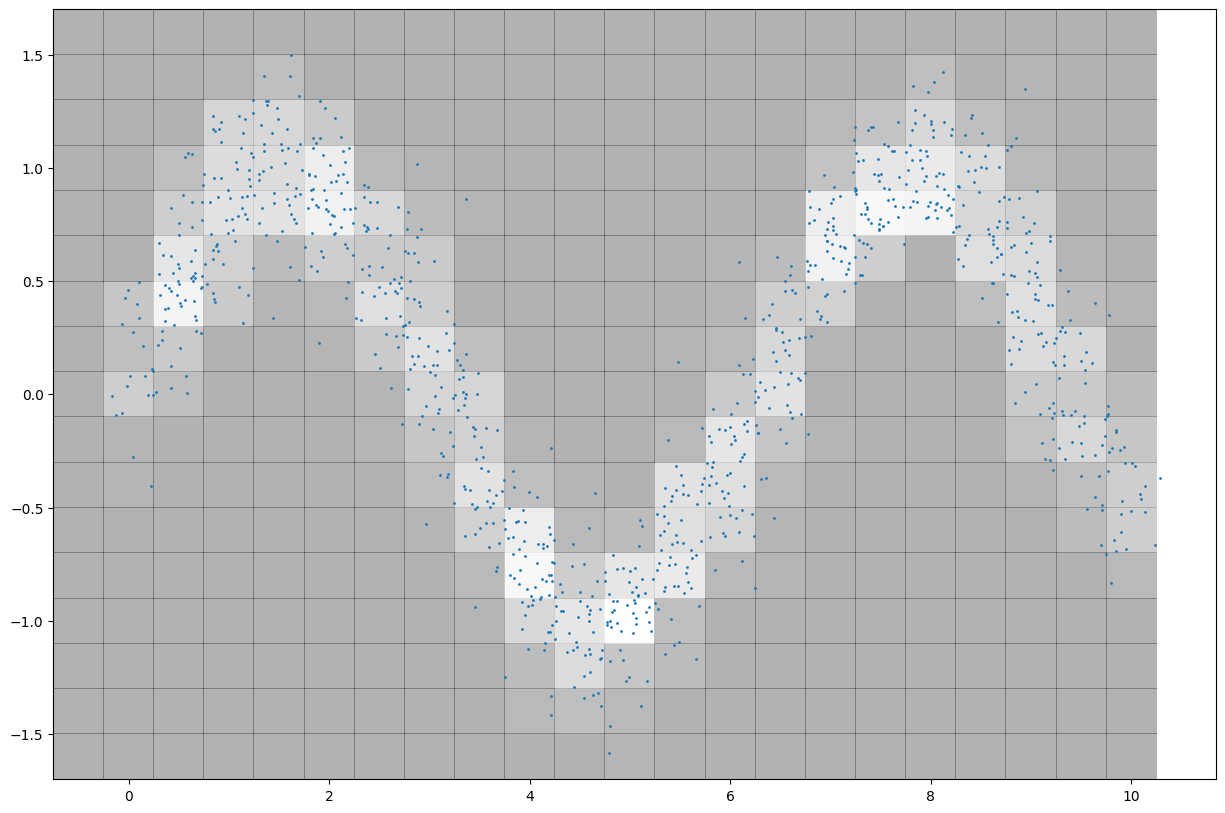

In [44]:
plt.figure(figsize=(15,10))
plt.pcolor(Hist[1], Hist[2], np.transpose(Hist[0]), cmap='gist_gray', alpha=0.3)
plt.scatter(xx+Noise1,yy+Noise2, s=1)

In [45]:
Hist

(array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  8.,  4.,  6.,  0.,  0.,
          0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  4.,  7., 19., 15.,  8.,
          4.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  7.,  9., 14.,
         12., 10.,  1.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  3., 14.,
         12., 11.,  4.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  8., 18.,
         17.,  7.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  7., 13.,  7., 11.,
          2.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  1.,  4.,  6., 10., 14.,  8.,  7.,  3.,
          1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  2.,  9., 14.,  9., 10.,  4.,  0.,  0.,  1.,
          0.,  0.,  0.,  0.],
        [ 0.,  2.,  3., 11., 20., 17.,  4.,  1.,  0.,  0.,  0., 